# Assignment 6

**Computer info:** MacBook Air, Chip: Apple M1, Ram: 8GB, macOs 13.4.1, 2020

<div class="alert alert-warning">
<strong>Instructions for Cell Execution:</strong>

1. Execute the cell under "Used Libraries as first".
2. Run the cells in the order they appear.
3. Certain experiments can be computationally expensive and may require a bit of time.
</div>

> Implement the Metropolis-Hastings (M-H) algorithm to simulate gamma distribution $Ga(\alpha, \beta)$, using exponential distribution $Exp(\lambda)$ as the proposal distribution. Simulate $Ga(3,1)$. Use the independence chains version of M-H. (Out of peergrave: $\alpha$ in gamma distribution and $\alpha$ denoting the acceptance probability are two different things;


**Indipendence chain:**
$$ q(\theta, \phi) = f(\phi)\text{.}$$


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import gamma, expon
import math
# Define the target distribution (Gamma) parameters
alpha = 3
beta = 1

# Define the number of iterations
num_iterations = 100000
num_samples=1000000

#change palette
import seaborn as sns
from matplotlib import colors
sns.set(rc={"axes.facecolor":"white" , "figure.facecolor":"#FCE6C9"})

In [2]:
def gamma_distribution(x, alpha=3, beta=1):
    if x > 0:
        return ((beta**alpha) / math.gamma(alpha)) * (x**(alpha - 1)) * (math.e**(-beta * x))
    return 0

In [3]:
def proposal(x, lambda_):
    return lambda_ * (math.e**(-lambda_ * x))

In [4]:
def metropolis_hastings_gamma(lambda_param, alpha=3, beta=1,  num_samples=num_samples):
    # Initialize the Markov Chain
    x = 1.0  # Initial value
    samples = []

    # Create gamma and exponential distribution objects
    gamma_dist = gamma(a=alpha, scale=1/beta)
    exponential_dist = expon(scale=1/lambda_param)

    for _ in range(num_samples):
        # Generate a proposal value from the exponential distribution
        y = exponential_dist.rvs()

        # Calculate the acceptance ratio
        acceptance_ratio = (gamma_dist.pdf(y) * exponential_dist.pdf(x)) / (gamma_dist.pdf(x) * exponential_dist.pdf(y))

        # Accept or reject the proposal
        u = np.random.uniform(0, 1)
        if u < acceptance_ratio:
            x = y  # Accept the proposal

        samples.append(x)

    return samples

## Point a

> Find the optimal proposal distribution, in this case, find the value for $\lambda$ that maximises the acceptance ratio. Determine this value with precision ± 0.05. To do this, compute acceptance ratios $A$ for various $\lambda$ values within an appropriate interval. For
instance, choose initially $\lambda_i\in [0.1, 1]$ with a suitable step of 0.1, perform 10^5 samples/iterations (i = 1, 2, … , 10^5) of Metropolis-Hastings acceptance evaluations to
determine $\lambda=\lambda_{opt}$. Then narrow down the interval and step for $\lambda_i$ until you can determine the value $\lambda=\lambda_{opt}$ with precision 0.05, that is, $\lambda=\lambda_{opt}^{correct} \pm 0.05$. Do this even
if you should be able to figure out the exact value for the optimum $\lambda=\lambda_{opt}$. In your solution, show a plot for an appropriate interval of $\lambda$ proving that you are picking the
correct value $\lambda=\lambda_{opt}$. ($\lambda$ on the horizontal axis, $A$ on the vertical axis) and that you can pick it with the given precision ±0.05. Of course, print out the value of $\lambda_{opt}$.

    1. Implement the Metropolis-Hastings (M-H) algorithm to simulate the gamma  distribution with exponential distribution as the proposal distribution.
    2. For distribution you are allowed to use scipy.stats.gamma..., scipy.stats.expon...
    3. For calculating the acceptance probability you can refer to slide 30 of the lecture.
    4.Repeat the process for 100000.
    5. Show a plot for an appropriate interval of 𝝀 (Line plot is recommended for this)

In [5]:
def find_best_lambda(alpha=3, beta=1, num_iterations=num_iterations, lambda_intervals=np.linspace(0.1, 1, 10)):
    acceptance_ratios = np.zeros(len(lambda_intervals))

    for index, current_lambda in enumerate(lambda_intervals):
        phi_value = np.random.exponential(1/current_lambda)
        for _ in range(num_iterations):
            phi_value = np.random.exponential(1/current_lambda)
            phi2_value = np.random.exponential(1/current_lambda)
            numerator = gamma_distribution(phi_value) * proposal(phi2_value, current_lambda)
            denominator = gamma_distribution(phi2_value) * proposal(phi_value, current_lambda)
            acceptance_ratio = min(1, numerator/denominator)

            if np.random.uniform() <= acceptance_ratio:
                acceptance_ratios[index] += 1
        acceptance_ratios[index] /= num_iterations

    optimal_lambda_index = np.argmax(acceptance_ratios)
    best_lambda=round(lambda_intervals[optimal_lambda_index], 5)
    
    # Visualize the acceptance ratios as a function of lambda intervals
    plt.plot(lambda_intervals, acceptance_ratios,marker='o',color='#104E8B',linewidth=1.5)
    plt.axvline(x=lambda_intervals[optimal_lambda_index], color='#68228B', linestyle='--',linewidth=2.5 , label='Optimal Lambda')
    plt.grid(alpha=0.75,color='#FCE6C9')
    plt.xlabel('Lambda (λ)')
    plt.ylabel('Acceptance Ratio (A)')
    plt.title(f'Acceptance Ratio vs. Lambda\n $λ_{{opt}}$={best_lambda}')
    plt.legend()
    plt.show()

    return best_lambda

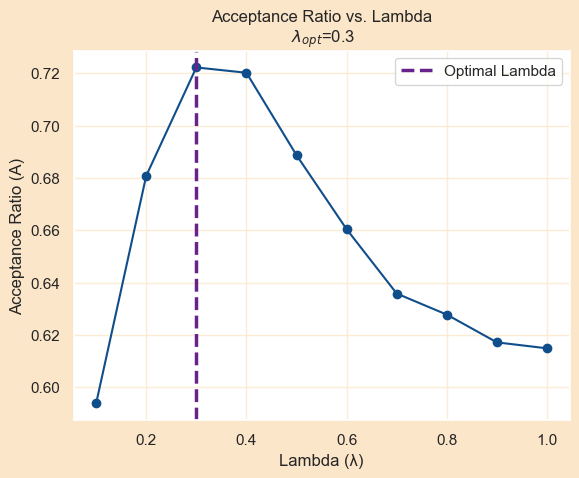

In [6]:
lambda_values = np.linspace(0.1, 1, 10)
_=find_best_lambda(lambda_intervals=lambda_values)

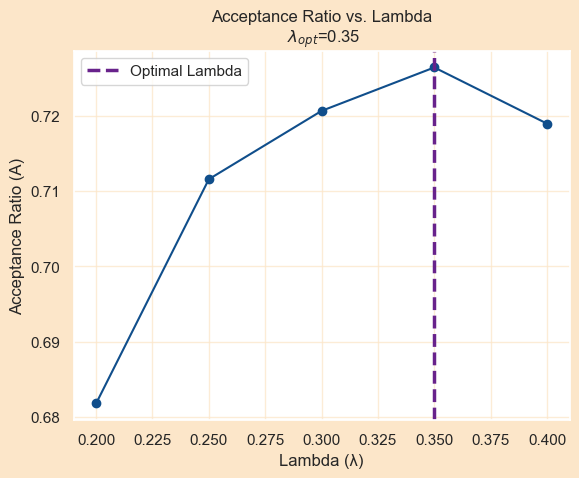

In [7]:
#narrow
lambda_values = np.linspace(0.2, 0.4, 5)
_=find_best_lambda(lambda_intervals=lambda_values)

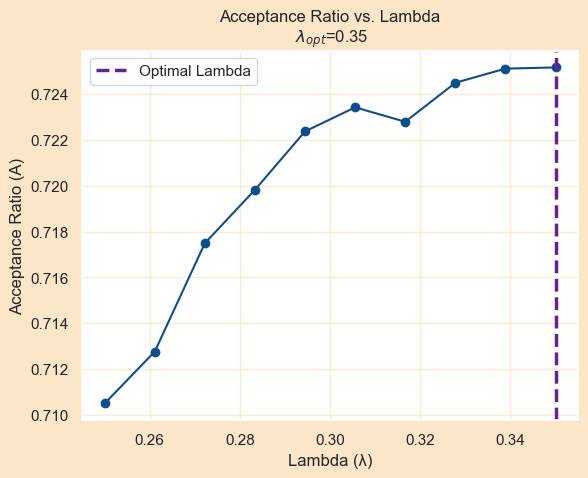

In [8]:
#norrower
lambda_values = np.linspace(0.25, 0.35, 10)
_=find_best_lambda(lambda_intervals=lambda_values)

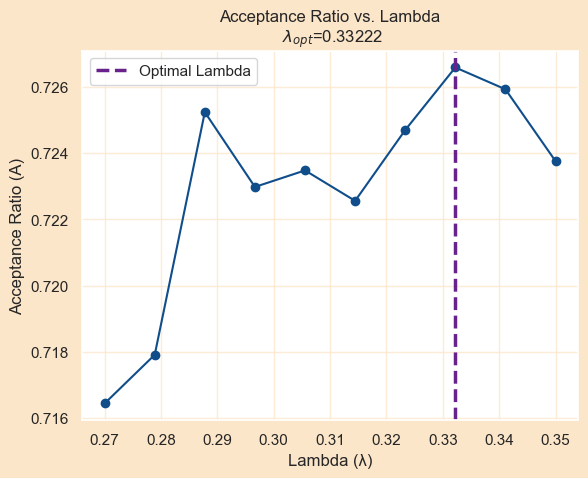

In [9]:
#norrower
lambda_values = np.linspace(0.27, 0.35, 10)
_=find_best_lambda(lambda_intervals=lambda_values)

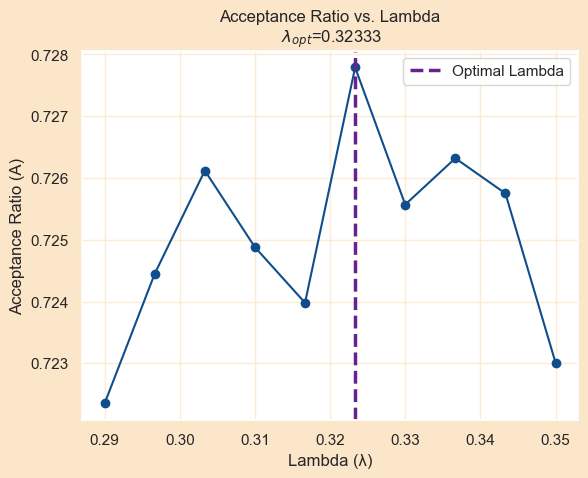

In [10]:
#norrower
lambda_values = np.linspace(0.29, 0.35, 10)
_=find_best_lambda(lambda_intervals=lambda_values)

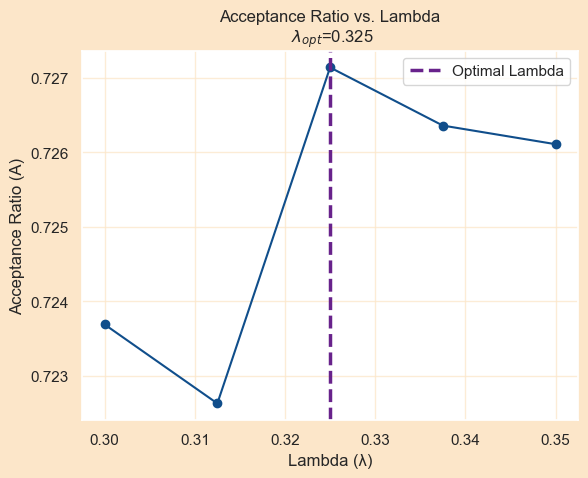

In [11]:
#norrower
lambda_values = np.linspace(0.30, 0.35, 5)
lambda_optimal=find_best_lambda(lambda_intervals=lambda_values)

In [12]:
print("Optimal lambda: ", lambda_optimal)

Optimal lambda:  0.325


## Point b

> (2 p) Use the optimal proposal distribution to simulate $Ga(3, 1)$. Simulate for $10^5$, samples. Plot the resulting distribution ($10^5$, points in a histogram, use a sufficient number of bins) with the corresponding functional form of the gamma distribution (line plot for this- not a histogram; for example plt.plot(np.arange..., Gamma(np.arange...)).

    1.Simulate 𝛤(𝑎, 𝑏) for 10,000 samples.
    2.Plot the resulting distribution in a histogram,
    3.Overlay the functional form of the gamma distribution as a line plot.

In [13]:
# Simulate using Metropolis-Hastings with the optimal proposal distribution
samples = metropolis_hastings_gamma(lambda_optimal,num_samples=num_samples)

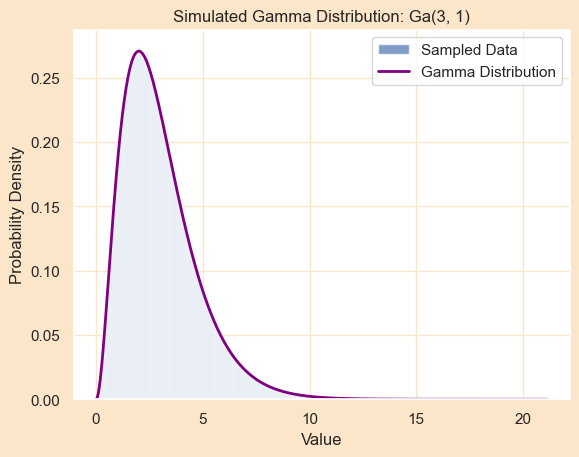

In [14]:
# Plot histogram of the resulting distribution
plt.hist(samples, bins=500, density=True, alpha=0.7, label='Sampled Data', rwidth=1)

# Overlay the functional form of the gamma distribution
x = np.linspace(0, max(samples), 1000)
y = gamma.pdf(x, a=alpha, scale=1/beta)

plt.plot(x, y, color='purple', label='Gamma Distribution',linewidth=2)

plt.xlabel('Value')
plt.ylabel('Probability Density')
plt.title(f'Simulated Gamma Distribution: Ga({alpha}, {beta})')
plt.legend()
plt.grid(True,color="#FCE6C9")
plt.show()

## Point c
Compute and print the numerical values for mean and variance for the resulting
distribution.

In [17]:
sample_mean = np.mean(samples)
sample_variance = np.var(samples)

# Print the results
print(f"Mean: {sample_mean:.4f}(expected: 3)")
print(f"Variance: {sample_variance:.4f}(expected: 3)")

Mean: 3.0028(expected: 3)
Variance: 2.9962(expected: 3)


## Point d
Which of the two methods, the Gibbs sampler or Metropolis-Hastings, requires less
information and so is more generally applicable? State briefly the reason for this (one
sentence will suffice).

The Metropolis-Hastings method, in general, is renowned for its adaptability and its capacity to work effectively with a range of proposal distributions, making it require less specific information about the target distribution. This adaptability is particularly valuable in situations where generating samples directly from the target distribution is hard or when there is limited knowledge about it.